Some great tutorials
 * https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c
 * https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pyramid.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IPG2211A2N&scale=left&cosd=1939-01-01&coed=2019-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-05-27&revision_date=2019-05-27&nd=1939-01-01')

In [3]:
df.index = pd.to_datetime(df['DATE'])
del df['DATE']
df.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [4]:
df.columns = ['energy']

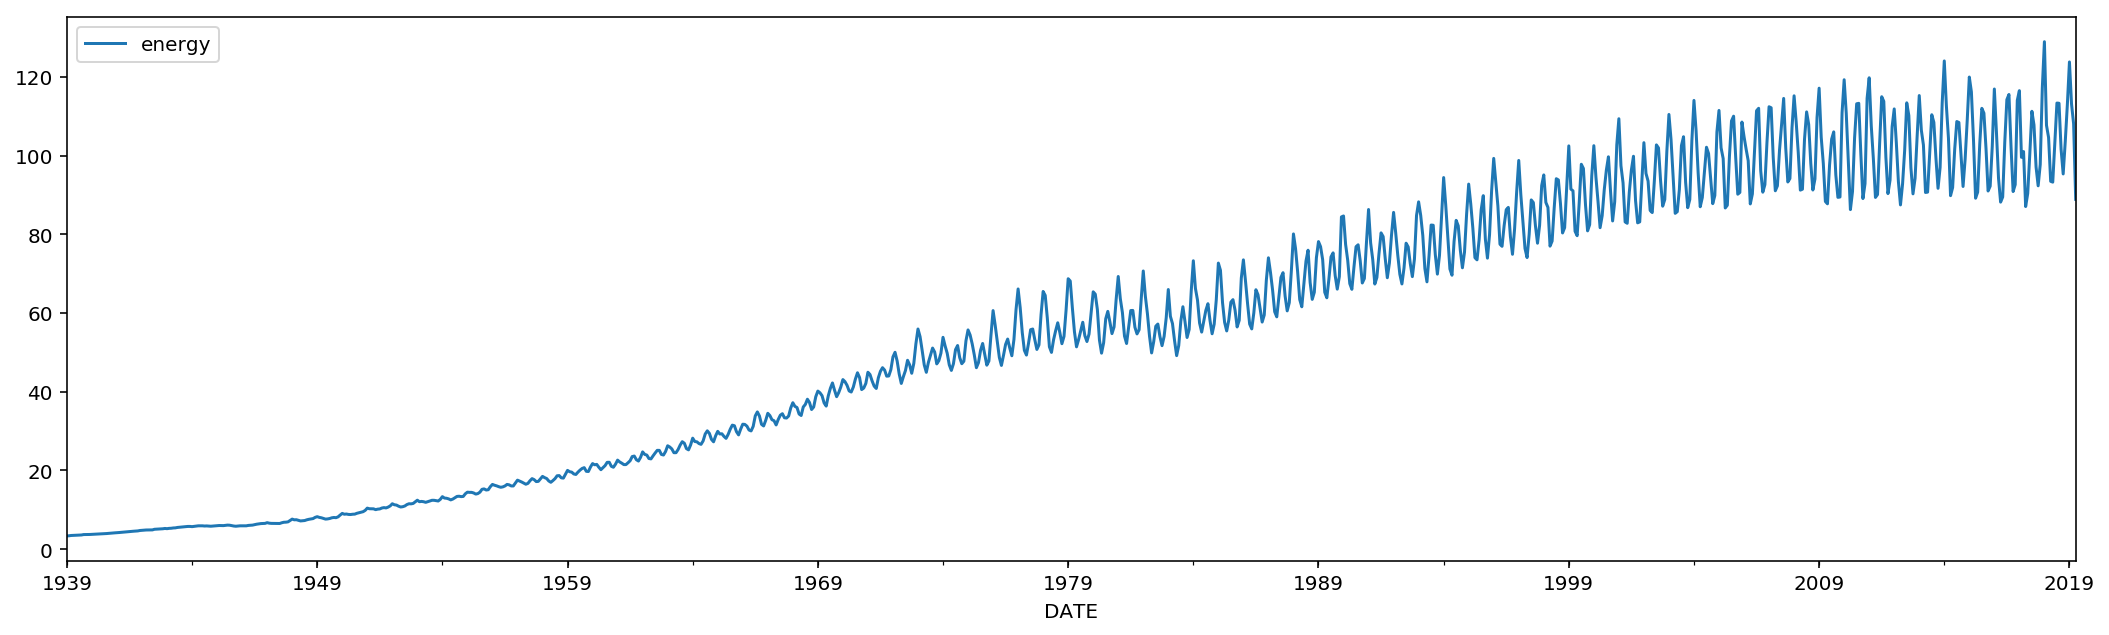

In [5]:
df.plot(figsize=(18,5));

### Time Series Decomposition

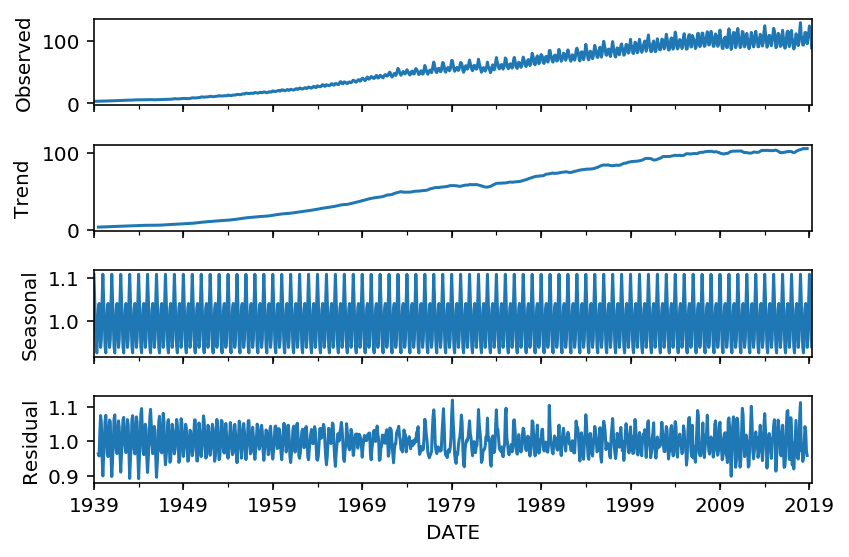

In [7]:
result = seasonal_decompose(df, model='multiplicative')
result.plot();

### Grid Search on Seasonal-ARIMA

In [51]:
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3804.750, BIC=3829.038, Fit time=2.842 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4316.862, BIC=4326.577, Fit time=0.093 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4151.141, BIC=4170.571, Fit time=0.964 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3929.018, BIC=3948.448, Fit time=1.108 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3803.893, BIC=3833.038, Fit time=4.305 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=3982.567, BIC=4006.855, Fit time=4.558 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3797.173, BIC=3831.176, Fit time=14.641 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3921.879, BIC=3951.024, Fit time=5.012 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3792.948, BIC=3831.808, Fit time=10.779 seconds
Fit ARIMA: order=(2, 1, 0)

In [43]:
train = df.loc['1985-01-01':'2016-12-01']
test = df.loc['2017-01-01':]

In [52]:
model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(4, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [53]:
future_forecast = stepwise_model.predict(n_periods=len(test))
print(future_forecast)

[  91.91938492  104.2184306   113.5940204   112.85162426  103.3094874
   94.7084562    99.98277368  112.20893135  122.99703786  111.52125041
  105.41811298   90.96377144   93.07646474  104.66326116  114.53384364
  113.51381282  103.63826602   94.94569092   99.49397864  113.41419256
  123.92024122  110.54422256  105.28459081   92.0511756    93.78312861
  105.12983017  115.11756919  114.21913395]


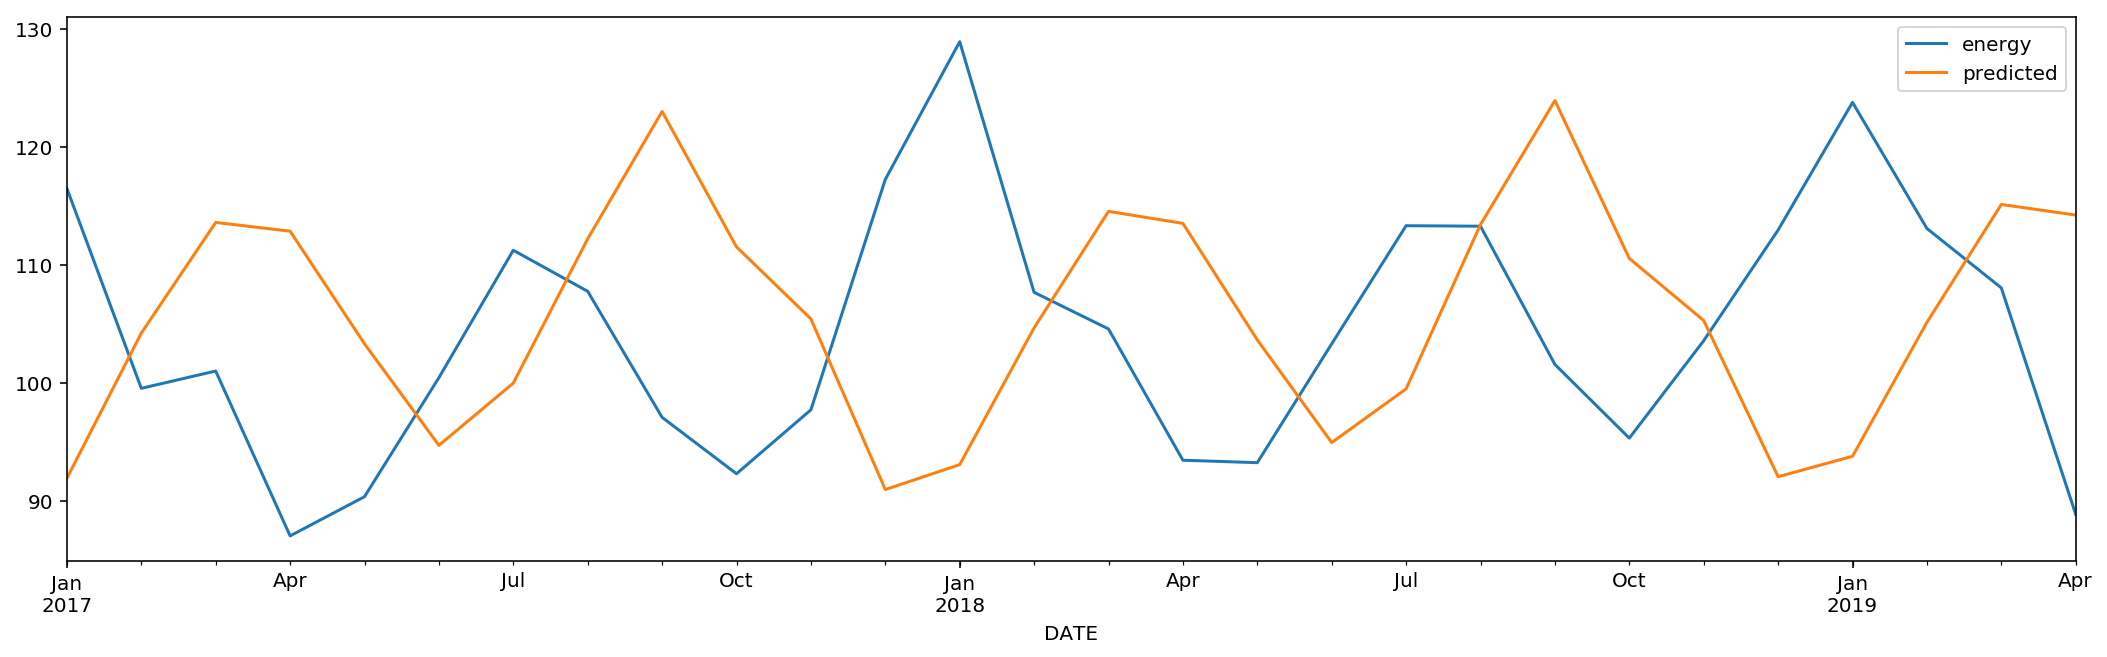

In [56]:
future_forecast = pd.DataFrame(future_forecast, index = test.index,columns=['predicted'])
pd.concat([test,future_forecast],axis=1).plot(figsize=(18,5));

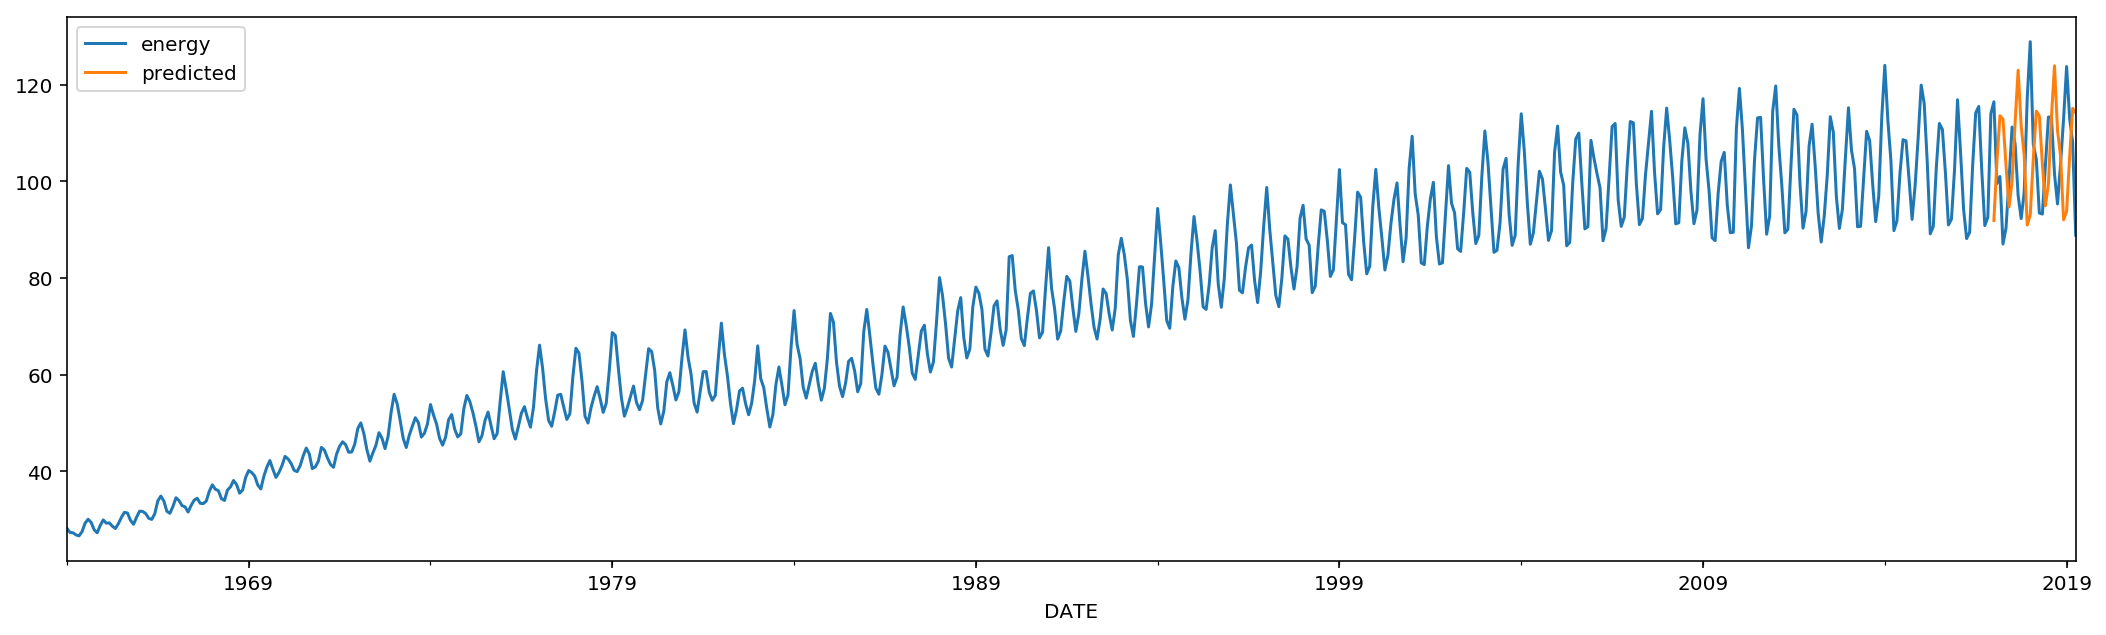

In [55]:
pd.concat([df,future_forecast],axis=1)[300:].plot(figsize=(18,5));

### Evaluation using RMSE

In [57]:
rms = sqrt(mean_squared_error(test,future_forecast))
print(rms)

17.50221412518062
